# Some advanced things that you can do in Python. 

First import packages you'll be using. 

For this portion, I'm going to feature [statsmodels](https://www.statsmodels.org/stable/index.html), [Altair](https://altair-viz.github.io), and [Geopandas](https://geopandas.org).
- Statsmodels is a packages that can do R-like formula statistics. I'll just be showing you an OLS linear regression. 
- Altair is still a work-in-progress, but it has some great features, as you will see. 
- Geopandas will allow you to easily plot a dataframe that has geospatial data.

In [4]:
import pandas as pd
import numpy as np
import altair as alt

import statsmodels.formula.api as smf
import re as re

Load our processed data.

In [5]:
df = pd.read_csv('../data/processed/merged_winner_pop_gdp.csv')

Check and clean our data

In [6]:
for col in df.columns:
    print(col, df[col].dtype)

Team object
Year int64
Bronze float64
Gold float64
Silver float64
Total Medals float64
Country object
Country_Code object
Population float64
Country Name object
Country Code object
Indicator Name object
GDP float64
GDP (in USD) float64


In [7]:
df.head()

,Team,Year,Bronze,Gold,Silver,Total Medals,Country,Country_Code,Population,Country Name,Country Code,Indicator Name,GDP,GDP (in USD)
0,Afghanistan,2008,1.0,0.0,0.0,1.0,Afghanistan,AFG,27294031.0,Afghanistan,AFG,GDP (current US$),1.010922e+10,1.010922e+10
1,Afghanistan,2012,1.0,0.0,0.0,1.0,Afghanistan,AFG,30696958.0,Afghanistan,AFG,GDP (current US$),2.000162e+10,2.000162e+10
2,Algeria,1984,2.0,0.0,0.0,2.0,Algeria,DZA,21893853.0,Algeria,DZA,GDP (current US$),5.369828e+10,5.369828e+10
3,Algeria,1992,1.0,1.0,0.0,2.0,Algeria,DZA,27181094.0,Algeria,DZA,GDP (current US$),4.800330e+10,4.800330e+10
4,Algeria,1996,1.0,2.0,0.0,3.0,Algeria,DZA,29411415.0,Algeria,DZA,GDP (current US$),4.694150e+10,4.694150e+10


### Add some new variables. 

In [100]:
df['GDP (in log10 billions)'] = np.log10(df['GDP']/1000000000.0)
df['Population (in log10 billions)'] = np.log10(df['Population']/1000000000.0)
df['Total Medals (log10)'] = np.log10(df['Total Medals'])

# Run some stats with statsmodels

Statsmodels formule don't deal well with special characters and spaces... 

In [101]:
df_smf = df.rename(columns=lambda x: re.sub('[^\w\s]','',x))
df_smf = df_smf.rename(columns=lambda x: re.sub('[\s]','',x))


In [102]:
df_smf.head()

,Team,Year,Bronze,Gold,Silver,TotalMedals,Country,Country_Code,Population,CountryName,CountryCode,IndicatorName,GDP,GDPinUSD,GDPinlog10billions,TotalMedalslog10,Populationinlog10billions
0,Afghanistan,2008,1.0,0.0,0.0,1.0,Afghanistan,AFG,27294031.0,Afghanistan,AFG,GDP (current US$),1.010922e+10,1.010922e+10,1.004718,0.000000,-1.563932
1,Afghanistan,2012,1.0,0.0,0.0,1.0,Afghanistan,AFG,30696958.0,Afghanistan,AFG,GDP (current US$),2.000162e+10,2.000162e+10,1.301065,0.000000,-1.512905
2,Algeria,1984,2.0,0.0,0.0,2.0,Algeria,DZA,21893853.0,Algeria,DZA,GDP (current US$),5.369828e+10,5.369828e+10,1.729960,0.301030,-1.659678
3,Algeria,1992,1.0,1.0,0.0,2.0,Algeria,DZA,27181094.0,Algeria,DZA,GDP (current US$),4.800330e+10,4.800330e+10,1.681271,0.301030,-1.565733
4,Algeria,1996,1.0,2.0,0.0,3.0,Algeria,DZA,29411415.0,Algeria,DZA,GDP (current US$),4.694150e+10,4.694150e+10,1.671557,0.477121,-1.531484


In [104]:
model = smf.ols('TotalMedalslog10 ~ GDPinlog10billions * Populationinlog10billions', data=df_smf)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       TotalMedalslog10   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     119.6
Date:                Fri, 28 Feb 2020   Prob (F-statistic):           1.42e-62
Time:                        18:28:11   Log-Likelihood:                -553.70
No. Observations:                 706   AIC:                             1115.
Df Residuals:                     702   BIC:                             1134.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -0.0181      0.148     -0.122      0.903      -0.308       0.272
GDPinlog10billions                               0.5284      0.055      9.550      0.000       0.420       0.637
Populationinlog10billions                       -0.0731      0.062     -1.176      0.240      -0.195       0.049
GDPinlog10billions:Populationinlog10billions     0.0782      0.027      2.933      0.003       0.026       0.131
==============================================================================
Omnibus:                       24.475   Durbin-Watson:                   0.784
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.036
Skew:                          -0.137   Prob(JB):                      0.00148
Kurtosis:                       2.393   Cond. No.                         35.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The bad news is that, unlike R, the plotting and statistical packages don't talk to each other.

This means that in order to plot this interaction, you will have to create the variables you want to plot, e.g. residualized variables and whatnot.

# Make some plots with Altair.

In [12]:
alt.Chart(df[df['Year']==1992]).mark_circle(
        color='red',
        size=100,
        opacity=0.3
    ).encode(
        x='Total Medals',
        y='GDP (in log10 billions)',
    )

alt.Chart(...)

In [13]:
alt.Chart(df[df['Year']==1992]).mark_circle(
        color='red',
        size=100,
        opacity=0.3
    ).encode(
        x='Total Medals',
        y='GDP (in log10 billions)',
        tooltip=['Year', 'Team']
    ).interactive()

alt.Chart(...)

In [108]:
selector = alt.selection_single(empty='all', fields=['Team'])

base = alt.Chart(df).properties(
    width=250,
    height=250
).add_selection(selector)

points = base.mark_point(filled=True, 
        opacity=0.3,
        size=200).encode(
    x='Total Medals (log10)',
    y='GDP (in log10 billions)',
    tooltip=['Team'],
    color=alt.condition(selector, 'Team:O', alt.value('lightgray'), legend=None),
)

timeseries = base.mark_line().encode(
    x='Year:O',
    y='Total Medals',
    color=alt.Color('Team:O', scale=alt.Scale(scheme='sinebow'), legend=None)
).transform_filter(
    selector
).add_selection(selector)

points | timeseries

alt.HConcatChart(...)

### Save plot as html file. 

In [109]:
(points | timeseries).save('../reports/figures/Medals_vs_GDP_byYear.html', embed_options={'renderer':'svg'})




# Geopandas

In [98]:
import matplotlib.pyplot as plt
import geopandas as gpd


In [96]:
df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [97]:
df_world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


I happened to notice that "United States of America" is not the same as "United States"

In [90]:
# df[df['Team'].str.contains('United')]
df_world['name'] = df_world['name'].replace("United States of America", "United States")

In [91]:
df_world_olympics = df_world.merge(df.groupby('Country').sum(), left_on="name", right_on="Country", how='inner')

In [92]:
df_world_olympics.head()
print(df_world_olympics.columns)
print(df_world_olympics['name'].unique())

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry',
       'Year', 'Bronze', 'Gold', 'Silver', 'Total Medals', 'Population', 'GDP',
       'GDP (in USD)', 'GDP (in log10 billions)', 'Total Medals (log10)'],
      dtype='object')
['Fiji' 'Tanzania' 'Canada' 'United States' 'Kazakhstan' 'Uzbekistan'
 'Indonesia' 'Argentina' 'Chile' 'Kenya' 'Sudan' 'Norway' 'South Africa'
 'Mexico' 'Uruguay' 'Brazil' 'Peru' 'Colombia' 'Panama' 'Costa Rica'
 'Guatemala' 'Guyana' 'Suriname' 'France' 'Ecuador' 'Puerto Rico'
 'Jamaica' 'Cuba' 'Zimbabwe' 'Botswana' 'Namibia' 'Senegal' 'Niger'
 'Nigeria' 'Cameroon' 'Togo' 'Ghana' 'Gabon' 'Zambia' 'Mozambique'
 'Burundi' 'Israel' 'Lebanon' 'Tunisia' 'Algeria' 'Jordan'
 'United Arab Emirates' 'Qatar' 'Kuwait' 'Iraq' 'Thailand' 'Vietnam'
 'Mongolia' 'India' 'Pakistan' 'Afghanistan' 'Tajikistan' 'Armenia'
 'Sweden' 'Belarus' 'Ukraine' 'Poland' 'Austria' 'Hungary' 'Moldova'
 'Romania' 'Lithuania' 'Latvia' 'Estonia' 'Germany' 'Bulgaria' 'Greece

In [93]:
df_world_olympics.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Year,Bronze,Gold,Silver,Total Medals,Population,GDP,GDP (in USD),GDP (in log10 billions),Total Medals (log10)
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",2016,0.0,13.0,0.0,13.0,8.987600e+05,4.930204e+09,4.930204e+09,0.692865,1.113943
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",1980,0.0,0.0,2.0,2.0,1.868316e+07,0.000000e+00,0.000000e+00,0.000000,0.301030
2,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",27840,228.0,86.0,153.0,467.0,3.813256e+08,9.230284e+12,9.230284e+12,35.867689,19.527364
3,326625791,North America,United States,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",27840,712.0,1568.0,838.0,3118.0,3.523617e+09,1.012747e+14,1.012747e+14,50.718343,32.632219
4,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",12036,29.0,19.0,22.0,70.0,9.573696e+07,5.611975e+11,5.611975e+11,10.801162,6.272740


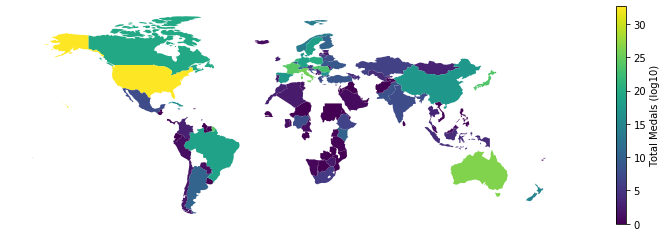

In [106]:
f, ax = plt.subplots(1,1,figsize=(16,4))
df_world_olympics.plot('Total Medals (log10)', legend=True, ax=ax, 
                        legend_kwds={'label': "Total Medals (log10)"})
plt.axis('off');

plt.savefig('../reports/figures/TotalMedals_map.pdf', bbox_inches = "tight")


# Challenge:

Can you make this plot for Medals won in 1992? 

(hint: you will need to create the right dataframe)